In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive/Colab Notebooks/01 - Machine Learning/

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/01 - Machine Learning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# set default style
from matplotlib import rcParams
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,4)})
rcParams['figure.figsize'] = 10,4

# Clustering

https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

https://scikit-learn.org/stable/modules/neighbors.html

sihouette score:

https://www.researchgate.net/figure/Derivation-of-the-Overall-Silhouette-Coefficient-OverallSil_fig1_221570710

## K Means Clustering

https://www.askpython.com/python/examples/k-means-clustering-from-scratch

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
dataset = pd.read_csv('./data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]]

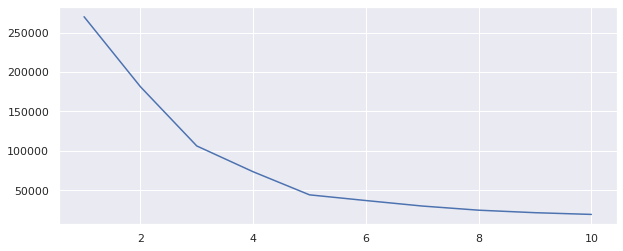

In [ ]:
# Using the elbow method to find the optimal number of clusters
# kmeans.inertia to find wcss/total distance from point to centroid 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plotting
plt.plot(range(1, 11), wcss)

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]
[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


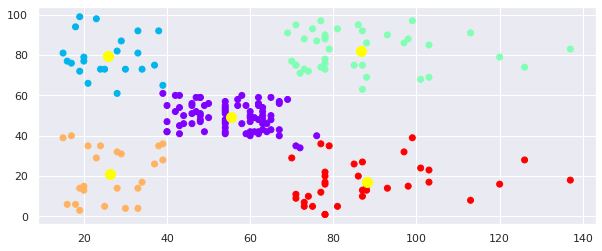

In [ ]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y_kmeans,cmap='rainbow');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

## Hierachy Clustering

Using dendogram to find the optimal number of cluster

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Importing the dataset
dataset = pd.read_csv('./data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]]

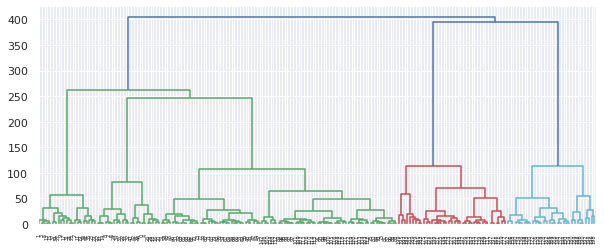

In [ ]:
# cluster = 5 for this case
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))

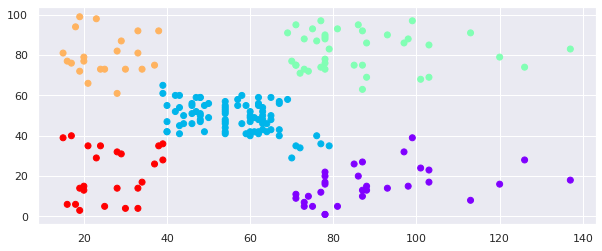

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_hc, cmap='rainbow');

## Mean Shift
https://www.youtube.com/watch?v=3ERPpzrDkVg

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
# Importing the dataset
dataset = pd.read_csv('./data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]]

In [ ]:
# estimate_bandwidth to get average pairwise distances between the samples
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_ms = ms.fit_predict(X)
cluster_centers = ms.cluster_centers_

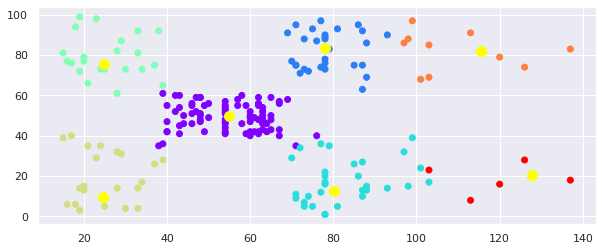

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_ms, cmap='rainbow');
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

## DBSCAN

Based on density using core and boundary point.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Importing the dataset
dataset = pd.read_csv('./data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]]
X = MinMaxScaler().fit_transform(X)

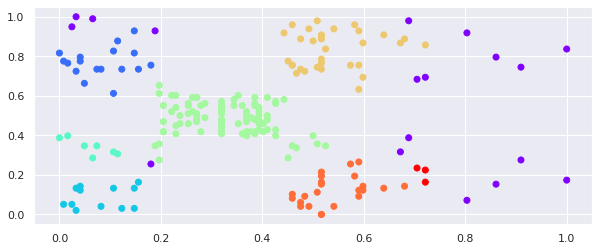

In [ ]:
db = DBSCAN(eps=0.08, min_samples=4)
db.fit(X)
y_db = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_db, cmap='rainbow');

In [ ]:
# -1 mena outlier
y_db[y_db == -1].size

39

## Spectral Clustering

Apply data transformation through eigen values decomposition and followed by KMeans

https://www.youtube.com/watch?v=YHz0PHcuJnk

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

## Birch

Another type of hierachical clustering using CF Tree. Speed up Memory.

https://slidetodoc.com/birch-balanced-iterative-reducing-and-clustering-using-hierarchies/

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html

https://analyticsindiamag.com/guide-to-birch-clustering-algorithmwith-python-codes/

## OPTICS

Extension of DBSCAN but using core distance and reachability distance. It identifies clusters with different densities. OPTICS does not segregate the given data into clusters. It merely produces a Reachability distance plot and it is upon the interpretation of the programmer to cluster the points accordingly.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html

https://towardsdatascience.com/clustering-using-optics-cac1d10ed7a7

https://www.machinecurve.com/index.php/2020/12/15/performing-optics-clustering-with-python-and-scikit-learn/

## Find Nearest Neighbor

Split point into different node using BallTree or KDTree, then only use brute force

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html

https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940

In [ ]:
from sklearn.neighbors import KDTree
from random import randrange

In [ ]:
dataset = pd.read_csv('./data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]]
print(X.shape)
tree = KDTree(X, leaf_size=20)

(200, 2)


In [ ]:
# find nearest neighbour of random point
random_p = randrange(len(X))
print(random_p)
dist, ind = tree.query(X.iloc[random_p : random_p + 1, :], k=5)
print(ind)
print(dist)

180
[[180 184 186 190 168]]
[[ 0.          7.28010989  8.94427191 10.81665383 11.18033989]]
